# CRISP-DM Case Study using Data Scientists Salary Data
## by Nabilla Shafira Bachtiar

In this notebook, I would like to demonstrate my comprehension in Data Science, especially in CRISP-DM. For the case study, I am going to use 2023 Data Scientists Salary Dataset which can be accessed [here](https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary).

# Initiation

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from sklearn.preprocessing import LabelEncoder
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-data-scientists-salary/ds_salaries.csv


# Bussiness Understanding

As we know, Data Scientist role has been quite popular (and still getting more popular) nowadays. But is it actually worth it? Will there be any inflation of this role in the near future? Therefore, I will summarize the problem into three questions which are going to be answered in this study.

1. How is the trend of the salary so far? Is it increasing or decreasing?
2. What are the defining factors of salary?
3. How is the prediction of future salary?

# Data Understanding

In this section, I will show you all what is inside the dataset along with a brief info about the dataset and statistics.

## DataFrame View

In [3]:
df = pd.read_csv('/kaggle/input/2023-data-scientists-salary/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Dataset info

In [4]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                     df[col].dtype, \
                     df[col].isna().sum(), \
                     round(100*(df[col].isna().sum()/len(df)),2), \
                     df[col].nunique(), \
                     df[col].unique()
                     ])
    return pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueValue'],data=data)

check_values(df)

,dataFeatures,dataType,null,nullPct,unique,uniqueValue
0,work_year,int64,0,0.0,4,"[2023, 2022, 2020, 2021]"
1,experience_level,object,0,0.0,4,"[SE, MI, EN, EX]"
2,employment_type,object,0,0.0,4,"[FT, CT, FL, PT]"
3,job_title,object,0,0.0,93,"[Principal Data Scientist, ML Engineer, Data S..."
4,salary,int64,0,0.0,815,"[80000, 30000, 25500, 175000, 120000, 222200, ..."
5,salary_currency,object,0,0.0,20,"[EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ..."
6,salary_in_usd,int64,0,0.0,1035,"[85847, 30000, 25500, 175000, 120000, 222200, ..."
7,employee_residence,object,0,0.0,78,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C..."
8,remote_ratio,int64,0,0.0,3,"[100, 0, 50]"
9,company_location,object,0,0.0,72,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F..."


## Descriptive Statistic

In code below, I convert `work_year` and `remote_ratio` columns into object since they are actually categorical data as there are only few unique values. After that, I separate numerical values and categorical values for easier process.

In [5]:
# Convert numerical into categorical ones
df[['work_year', 'remote_ratio']] = df[['work_year', 'remote_ratio']].astype(object)

# Check values for the updated data
check_values(df)

,dataFeatures,dataType,null,nullPct,unique,uniqueValue
0,work_year,object,0,0.0,4,"[2023, 2022, 2020, 2021]"
1,experience_level,object,0,0.0,4,"[SE, MI, EN, EX]"
2,employment_type,object,0,0.0,4,"[FT, CT, FL, PT]"
3,job_title,object,0,0.0,93,"[Principal Data Scientist, ML Engineer, Data S..."
4,salary,int64,0,0.0,815,"[80000, 30000, 25500, 175000, 120000, 222200, ..."
5,salary_currency,object,0,0.0,20,"[EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ..."
6,salary_in_usd,int64,0,0.0,1035,"[85847, 30000, 25500, 175000, 120000, 222200, ..."
7,employee_residence,object,0,0.0,78,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C..."
8,remote_ratio,object,0,0.0,3,"[100, 0, 50]"
9,company_location,object,0,0.0,72,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F..."


In [6]:
# Separate numerical and categorical data
num_data = df.select_dtypes(include=['int64', 'float64'])
cat_data = df.select_dtypes(include='object')
columns_to_exclude = ['job_title', 'salary_currency', 'employee_residence', 'company_location']
cat_data_dropped = cat_data.drop(columns=columns_to_exclude)

### Numerical data
Since `salary` column is actually salary value from various currency, I don't consider it for my analysis now since it would be invalid to compare them. So, I just consider the `salary_in_usd` column.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


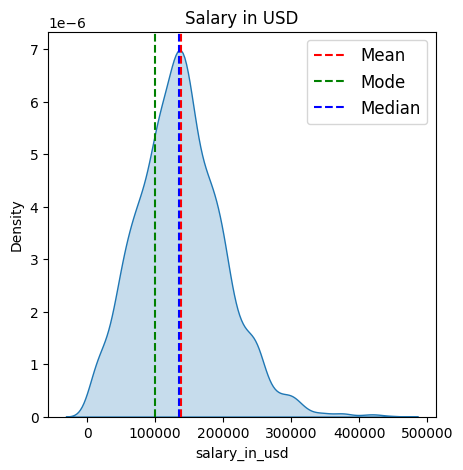

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=num_data['salary_in_usd'], fill=True, ax=axes)
axes.set_title('Salary in USD')

mean_val = num_data['salary_in_usd'].mean()
mode_val = num_data['salary_in_usd'].mode().iloc[0]
median_val = num_data['salary_in_usd'].median()

axes.axvline(mean_val, color='r', linestyle='--', label='Mean')
axes.axvline(mode_val, color='g', linestyle='--', label='Mode')
axes.axvline(median_val, color='b', linestyle='--', label='Median')

legend = axes.legend(fontsize='large') 

plt.show()

### Categorical data

Here, I visualize the distribution of values in each categorical columns. For some variables with less unique values, I also use bar plot. But, for the others with more unique values, I use pie plot for clearer distribution.

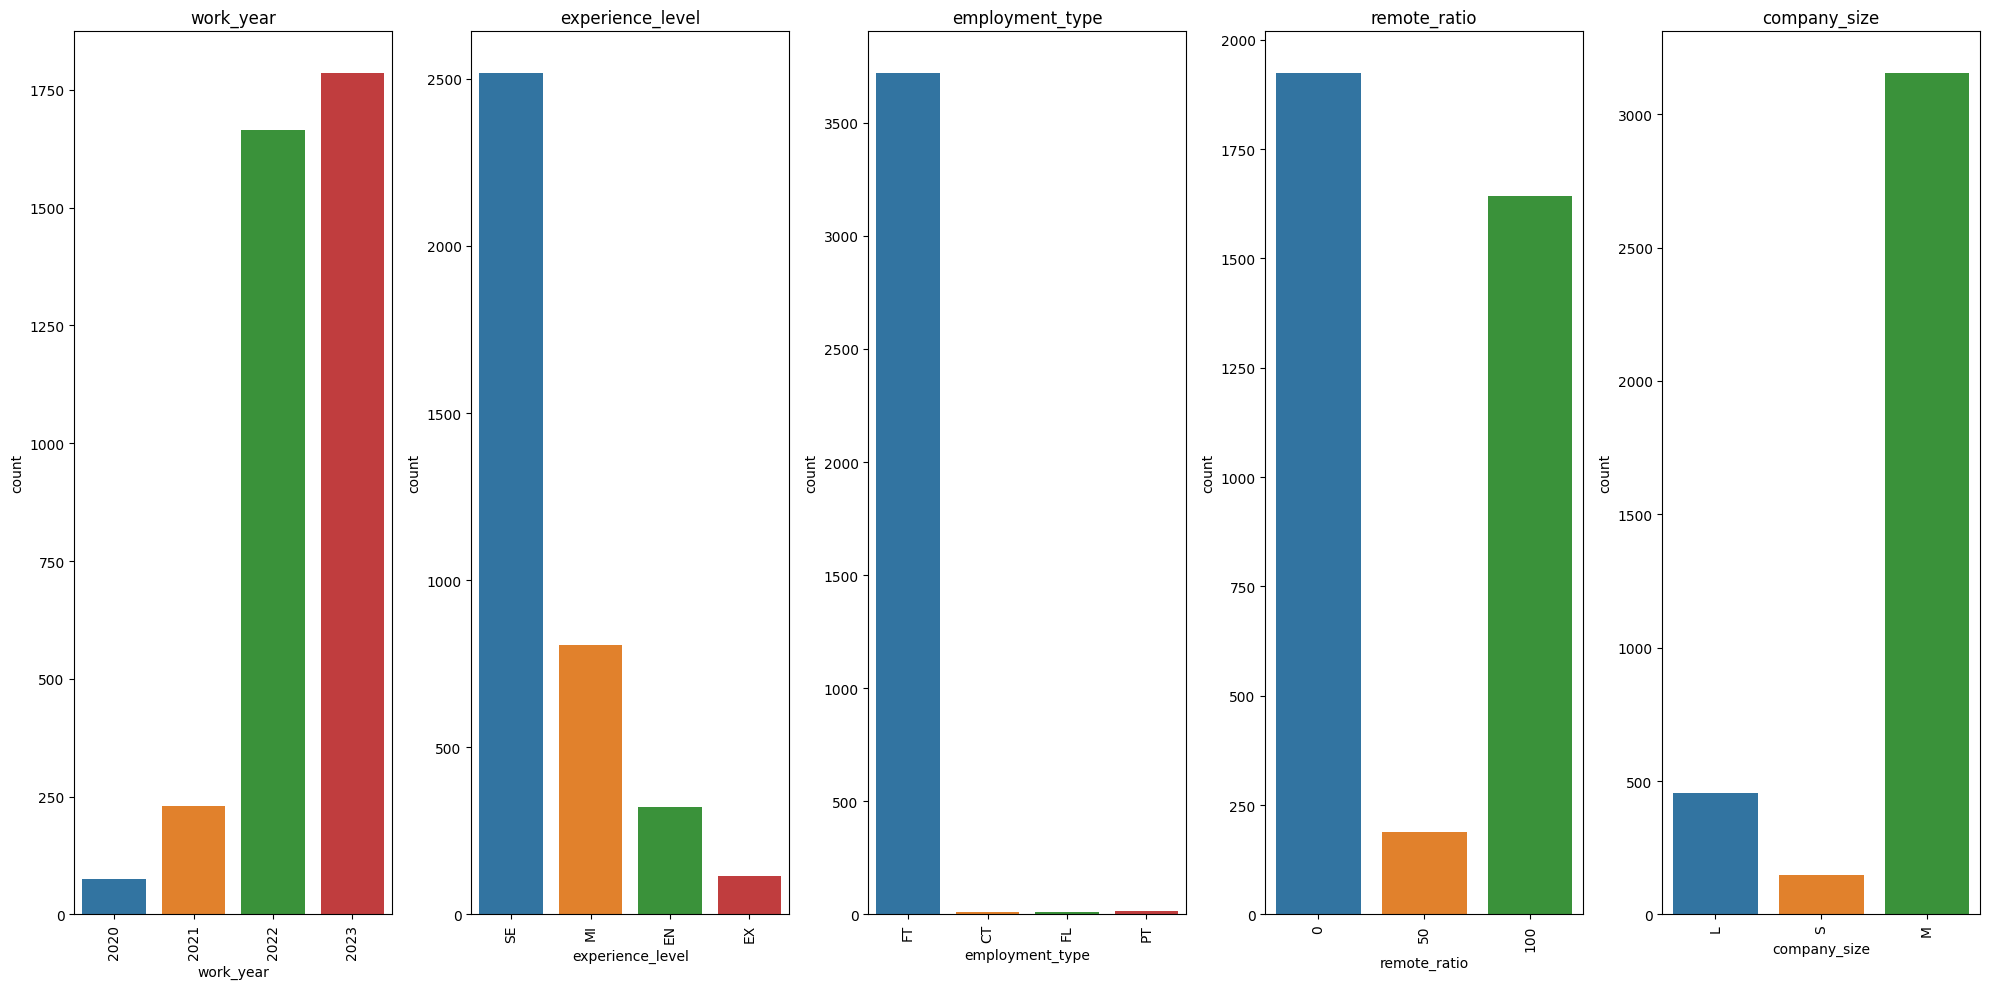

In [8]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_data_dropped.columns):
    plt.subplot(1, 5, i+1)
    top_10_values = cat_data_dropped[column].value_counts().head(10)
    sns.countplot(data=cat_data_dropped, x=column)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

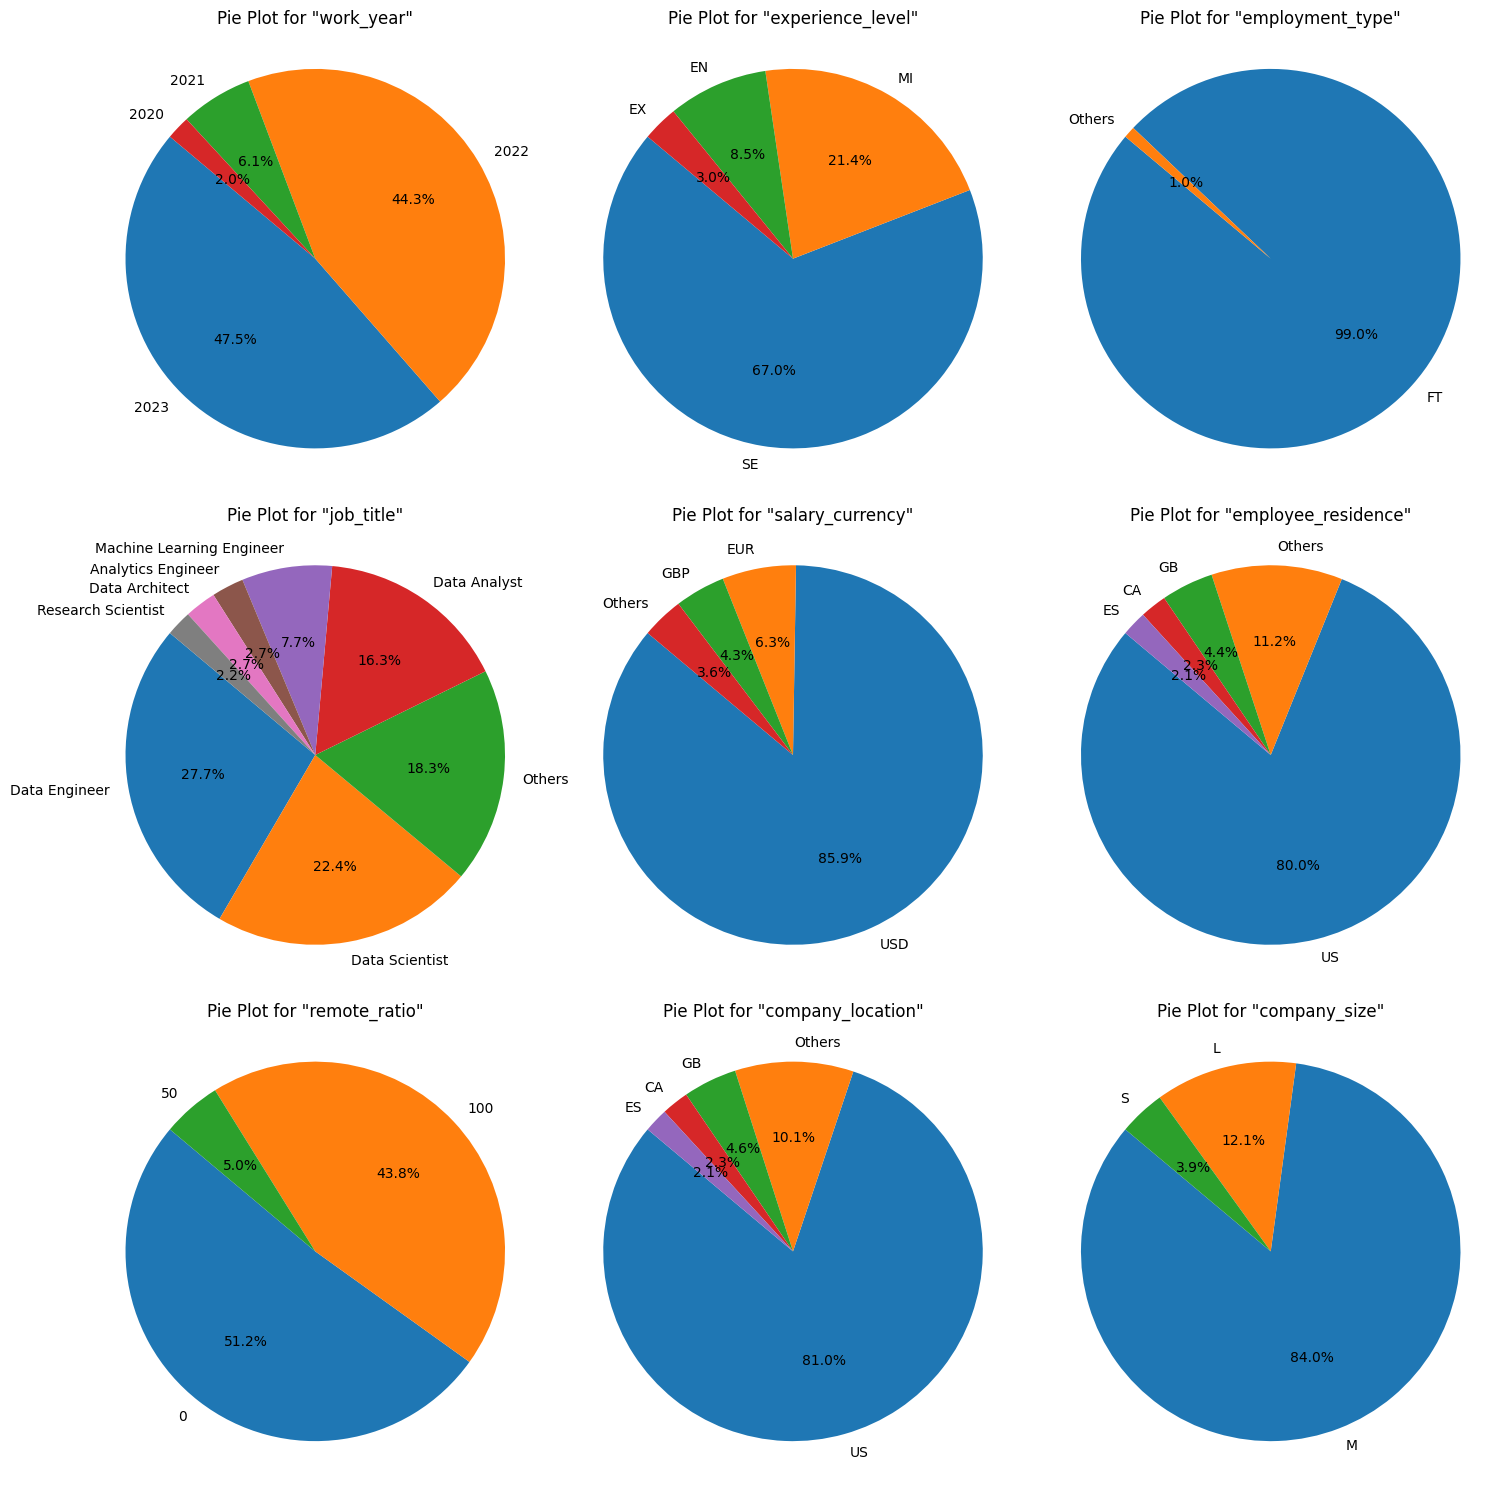

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import math

cat_data_new = pd.DataFrame()

# Preprocess categories
for column in cat_data.columns:
    counts = cat_data[column].value_counts()
    threshold = (2/100)*cat_data[column].count()  # 2%
    small_categories = counts[counts < threshold].index.tolist()
    cat_data_new[column] = cat_data[column].apply(
        lambda x: 'Others' if x in small_categories else x
    )

# Grid size
n_cols = 3  # how many charts per row
n_plots = len(cat_data.columns)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, column in enumerate(cat_data.columns):
    counts = cat_data_new[column].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Pie Plot for "{column}"')
    axes[i].axis('equal')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Data Preparation
After data has been understood, now I prepare the data for better modelling.

## Drop unnecessary columns

Since `salary` in each currency will be irrelevant for this study, I will drop the `salary` and `salary_currency` columns.

In [10]:
df = df.drop(['salary', 'salary_currency'], axis=1)
check_values(df)

,dataFeatures,dataType,null,nullPct,unique,uniqueValue
0,work_year,object,0,0.0,4,"[2023, 2022, 2020, 2021]"
1,experience_level,object,0,0.0,4,"[SE, MI, EN, EX]"
2,employment_type,object,0,0.0,4,"[FT, CT, FL, PT]"
3,job_title,object,0,0.0,93,"[Principal Data Scientist, ML Engineer, Data S..."
4,salary_in_usd,int64,0,0.0,1035,"[85847, 30000, 25500, 175000, 120000, 222200, ..."
5,employee_residence,object,0,0.0,78,"[ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C..."
6,remote_ratio,object,0,0.0,3,"[100, 0, 50]"
7,company_location,object,0,0.0,72,"[ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F..."
8,company_size,object,0,0.0,3,"[L, S, M]"


## Encoding

For easier calculation, I will encode ordinal data: `experience_level` and `company_size`

In [11]:
df['experience_level'] = df['experience_level'].replace({'EN': 0, 'MI': 1, 'SE': 2, 'D': 3, 'EX': 4})
df['company_size'] = df['company_size'].replace({'S': 0, 'M': 1, 'L': 2})

df.head()

/tmp/ipykernel_33/1994925726.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({'EN': 0, 'MI': 1, 'SE': 2, 'D': 3, 'EX': 4})
/tmp/ipykernel_33/1994925726.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['company_size'] = df['company_size'].replace({'S': 0, 'M': 1, 'L': 2})


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,2,FT,Principal Data Scientist,85847,ES,100,ES,2
1,2023,1,CT,ML Engineer,30000,US,100,US,0
2,2023,1,CT,ML Engineer,25500,US,100,US,0
3,2023,2,FT,Data Scientist,175000,CA,100,CA,1
4,2023,2,FT,Data Scientist,120000,CA,100,CA,1


# Modelling
Now, I will try to answer the question.

## 1. Trend of salary by Year
For answering this question I plot salary in USD using boxplot. 

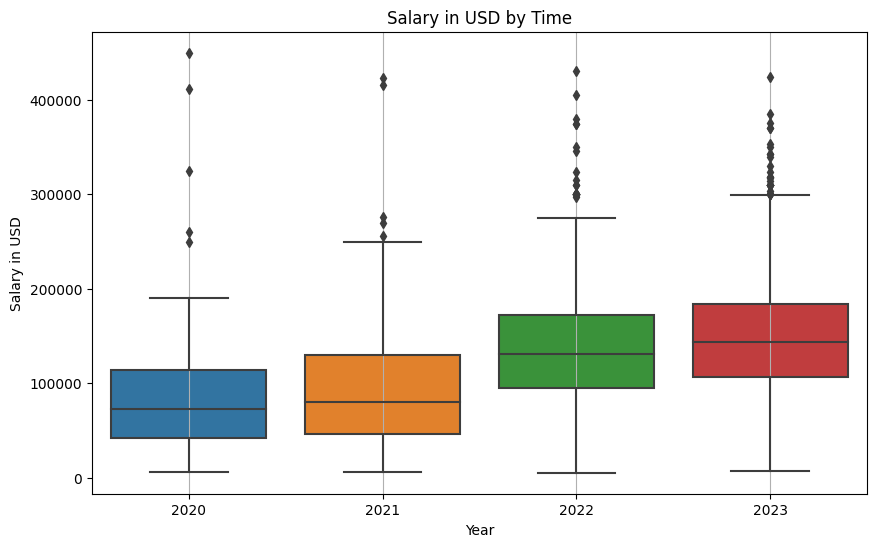

In [12]:
# Create a time plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="work_year", y="salary_in_usd")

# Customize the plot
plt.title('Salary in USD by Time')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.grid(True, axis='x')
plt.show()

Based on this boxplot, it can be concluded that **the salary is increasing** as the year goes by.

Next, I compare salary with work year and experience level.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

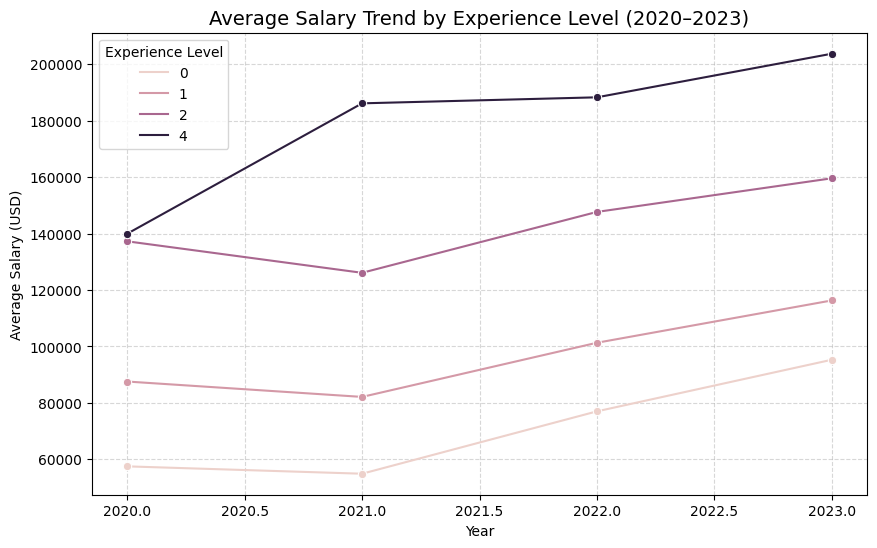

In [15]:
# Group by year and experience level
salary_trend = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=salary_trend,
    x='work_year',
    y='salary_in_usd',
    hue='experience_level',
    marker='o'
)

plt.title("Average Salary Trend by Experience Level (2020–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.legend(title="Experience Level")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Based on the chart, we can see:

- Executives (EX) and senior-level professionals (SE) show the highest salaries with noticeable jumps over the years.
- Mid-level (MI) roles also display an upward slope, though not as steep.
- Entry-level (EN) salaries remain the lowest, but they too show gradual improvement.

**Conclusion:**
The salary trend from 2020 to 2023 is increasing, with clear growth across all experience levels. 

## 2. Defining Factors of the Salary
Here, I also want to find how much each factors contributes to the salary

array([[<Axes: xlabel='experience_level', ylabel='experience_level'>,
        <Axes: xlabel='salary_in_usd', ylabel='experience_level'>,
        <Axes: xlabel='company_size', ylabel='experience_level'>],
       [<Axes: xlabel='experience_level', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <Axes: xlabel='company_size', ylabel='salary_in_usd'>],
       [<Axes: xlabel='experience_level', ylabel='company_size'>,
        <Axes: xlabel='salary_in_usd', ylabel='company_size'>,
        <Axes: xlabel='company_size', ylabel='company_size'>]],
      dtype=object)

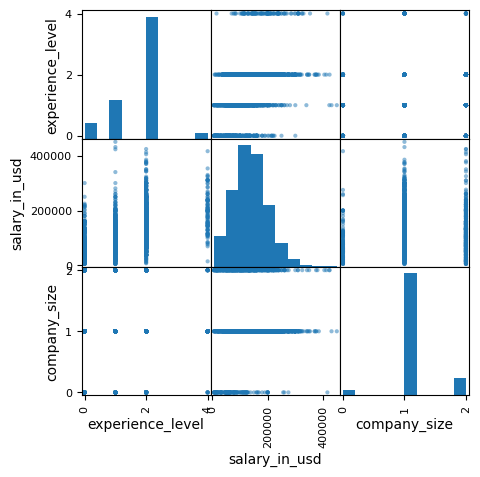

In [14]:
pd.plotting.scatter_matrix(df, figsize=(5,5))

From the analysis, the two most important defining factors of salary are:

**Experience Level**
- Salaries increase significantly with experience.
- Entry-level roles are concentrated in the lower salary range.
- Mid-level and senior professionals earn higher salaries, while executives occupy the top salary bracket.

This indicates that experience level is the strongest determinant of salary.

**Company Size**
- Larger companies consistently pay higher salaries compared to small companies.
- Small companies mostly offer salaries on the lower end, while medium and large companies show a wider distribution, including high salaries.

This shows that company size is also a key factor influencing salary levels.

**Additional observations:**
- The overall salary distribution shows most salaries between $100k–$150k, but executives at large companies can reach above $400k.
- While other variables (like job title or employment type) may contribute, experience level and company size clearly dominate the relationship with salary in this dataset.

## 3. Prediction of Future Salary

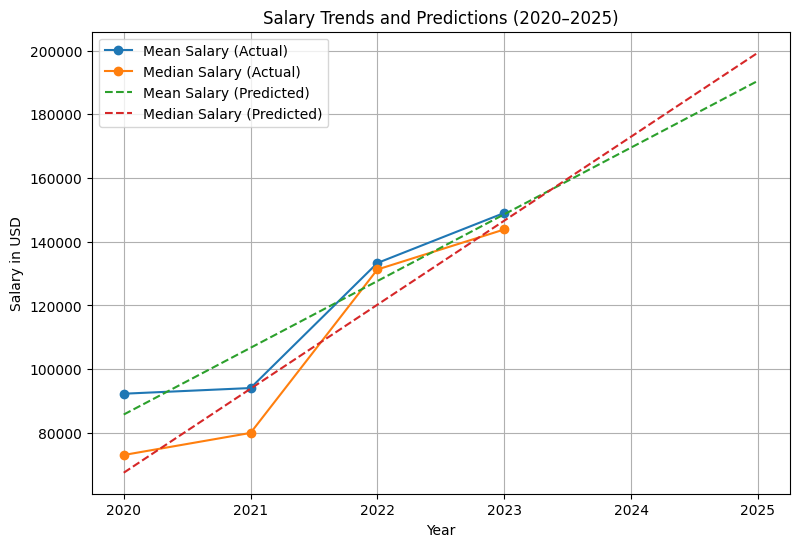

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Group salaries by year (mean & median)
yearly_salary = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median']).reset_index()

# Prepare data for regression
X = yearly_salary['work_year'].values.reshape(-1, 1)

# Fit regression for mean
reg_mean = LinearRegression()
reg_mean.fit(X, yearly_salary['mean'])
future_years = np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
mean_pred = reg_mean.predict(future_years)

# Fit regression for median
reg_median = LinearRegression()
reg_median.fit(X, yearly_salary['median'])
median_pred = reg_median.predict(future_years)

# Plotting
plt.figure(figsize=(9,6))
plt.plot(yearly_salary['work_year'], yearly_salary['mean'], marker='o', label='Mean Salary (Actual)')
plt.plot(yearly_salary['work_year'], yearly_salary['median'], marker='o', label='Median Salary (Actual)')

# Add regression lines
plt.plot(future_years, mean_pred, linestyle='--', label='Mean Salary (Predicted)')
plt.plot(future_years, median_pred, linestyle='--', label='Median Salary (Predicted)')

plt.title('Salary Trends and Predictions (2020–2025)')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion:**
Based on the regression analysis of salaries from 2020 to 2023, both the mean and median salary trends show an upward trajectory. The median salary provides a more reliable measure, as it reduces the impact of extreme outliers present in the dataset. Projections for 2024–2025 indicate that salaries for data scientists are likely to continue increasing steadily. While the mean salary suggests a stronger growth rate due to high earners in the market, the median salary shows a more moderate but consistent rise, reflecting the general salary trend for most professionals. Overall, the forecast indicates a positive outlook for data scientist salaries in the coming years.

# Conclusion
From the analysis of the 2020–2023 Data Scientist Salary dataset, several insights can be drawn:

**Salary Trend (Q1):**
Salaries have shown a clear upward trend from 2020 to 2023. Despite some fluctuations in the data, the general pattern indicates that compensation for data science roles is steadily increasing, with 2023 reaching the highest average and median salary so far.

**Defining Factors of Salary (Q2):**
Salary levels are influenced by multiple factors. Key determinants include experience level, employment type, company size, and location. More experienced professionals, those working full-time, and those employed by larger companies generally earn higher salaries. Regional differences also play a role, with companies based in higher-cost regions offering better pay.

**Future Salary Prediction (Q3):**
Forecasting salaries using both mean and median values shows a continued rise in the coming years. The mean salary grows faster, pulled up by outliers (very high salaries), while the median salary shows a steadier and more reliable upward trajectory. This suggests that while some elite positions will see dramatic increases, the typical data scientist salary will also keep improving gradually.

## Comparing Q1 and Q3:

In Q1, we observed that salaries have consistently risen from 2020 to 2023.

In Q3, the predictive model extends this trend, suggesting that the positive growth will continue into 2024 and beyond.

The comparison shows consistency between historical trends and future projections, giving strong evidence that the data science field remains financially rewarding and will likely become even more attractive in the near future.

## Overall Case Study Insight:
The findings highlight not only the past and current salary growth but also a promising outlook for future compensation in data science careers. For professionals in the field, upskilling and gaining experience are critical for maximizing salary potential, while organizations must remain competitive in their offers to attract and retain talent in an increasingly in-demand profession.